## Stakeholder: Real Estate Agency seeking a model to determine price of homes.

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
#Disabling pretty printing
%pprint

Pretty printing has been turned OFF


In [3]:
#Loading in original dataset
df_original = pd.read_csv("data/kc_house_data.csv")

### Viewing the data

In [4]:
#Checking the data
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#Checking NA values
df_original.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
#checking the data
df_original.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Cleaning the data

In [7]:
#Making a copy to preserve original dataframe for point of reference
from copy import deepcopy
df = deepcopy(df_original)

In [8]:
#Sanity check
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
#Dropping NAN values from view so we can encode the ordinal values 
df.dropna(subset=['view'], inplace = True)

#### Some data is catagorical, converting using OrdinalEncoder

In [10]:
# Selecting columns to convert
ord_cat_selector = ['condition', 'grade', 'view']
cat_subset = df[ord_cat_selector]
cat_subset

,condition,grade,view
0,Average,7 Average,NONE
1,Average,7 Average,NONE
2,Average,6 Low Average,NONE
3,Very Good,7 Average,NONE
4,Average,8 Good,NONE
...,...,...,...
21592,Average,8 Good,NONE
21593,Average,8 Good,NONE
21594,Average,7 Average,NONE
21595,Average,8 Good,NONE


In [11]:
print(cat_subset['condition'].unique())
print(cat_subset['grade'].unique())
print(cat_subset['view'].unique())

['Average' 'Very Good' 'Good' 'Poor' 'Fair']
['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


In [12]:
# Ordering the items
condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
grade_list = ['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good',
              '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']

In [13]:
o_enc = OrdinalEncoder(categories = [condition_list, grade_list, view_list])
o_enc.fit(cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['3 Poor', '4 Low', '5 Fair', '6 Low Average',
                            '7 Average', '8 Good', '9 Better', '10 Very Good',
                            '11 Excellent', '12 Luxury', '13 Mansion'],
                           ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']])

In [14]:
#create dataframe of ordinal data
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)
X_subset

,condition,grade,view
0,2.0,4.0,0.0
1,2.0,4.0,0.0
2,2.0,3.0,0.0
3,4.0,4.0,0.0
4,2.0,5.0,0.0
...,...,...,...
21529,2.0,5.0,0.0
21530,2.0,5.0,0.0
21531,2.0,4.0,0.0
21532,2.0,5.0,0.0


In [15]:
#input ordinal data into df
df['cond_num'] = X_subset['condition']
df['grade_num'] = X_subset['grade']
df['view_num'] = X_subset['view']

In [16]:
#Sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   17704 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

In [17]:
print(df['cond_num'].value_counts())
print(df['grade_num'].value_counts())
print(df['view_num'].value_counts())

2.0    13942
3.0     5639
4.0     1693
1.0      169
0.0       29
Name: cond_num, dtype: int64
4.0     8924
5.0     6041
6.0     2594
3.0     2021
7.0     1128
8.0      395
2.0      242
9.0       87
1.0       26
10.0      13
0.0        1
Name: grade_num, dtype: int64
0.0    19368
2.0      955
3.0      505
1.0      329
4.0      315
Name: view_num, dtype: int64


In [18]:
df['grade_num'] = np.where(df['grade_num'] == 0.0, 1.0, df['grade_num'])
#only 1 value was at 0.0 had to replace for future processing

In [19]:
#Sanity check
print(df['cond_num'].value_counts())
print(df['grade_num'].value_counts())
print(df['view_num'].value_counts())

2.0    13942
3.0     5639
4.0     1693
1.0      169
0.0       29
Name: cond_num, dtype: int64
4.0     8924
5.0     6041
6.0     2594
3.0     2021
7.0     1128
8.0      395
2.0      242
9.0       87
1.0       27
10.0      13
Name: grade_num, dtype: int64
0.0    19368
2.0      955
3.0      505
1.0      329
4.0      315
Name: view_num, dtype: int64


In [20]:
print(df['condition'].value_counts())
print(df['grade'].value_counts())
print(df['view'].value_counts())

Average      13981
Good          5657
Very Good     1697
Fair           170
Poor            29
Name: condition, dtype: int64
7 Average        8948
8 Good           6053
9 Better         2604
6 Low Average    2031
10 Very Good     1130
11 Excellent      397
5 Fair            242
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64


In [21]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   17704 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

In [22]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2370
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
cond_num           62
grade_num          62
view_num           62
dtype: int64

In [23]:
#after too much time, we couldnt discover to source of 62 NAN's appearing. so we drop them
df.dropna(subset=['view_num', 'cond_num', 'grade_num'], inplace = True)

In [24]:
#sanity check
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2359
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3818
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
cond_num            0
grade_num           0
view_num            0
dtype: int64

In [25]:
#The basement datatype should be numeric, however it was an object containing "?"" values. 
df['sqft_basement'] =  df["sqft_basement"].replace("?", np.NaN)
#sanity check
df['sqft_basement'].isna().sum()

451

In [26]:
df.dropna(subset = ["sqft_basement"], inplace = True)
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [27]:
#sanity check
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,cond_num,grade_num,view_num
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2.0,4.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2.0,4.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2.0,3.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,4.0,4.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21529,6669080120,12/15/2014,405000.0,4,2.50,1980,5020,2.0,NO,NONE,...,2007,0.0,98056,47.5147,-122.190,1980,5064,2.0,5.0,0.0
21530,9211010300,7/7/2014,509900.0,3,2.50,3030,9053,2.0,NO,NONE,...,2009,0.0,98059,47.4945,-122.149,3010,6026,2.0,5.0,0.0
21531,3277800823,8/20/2014,327000.0,2,2.00,1490,1627,2.0,NO,NONE,...,2009,0.0,98126,47.5455,-122.375,1400,1498,2.0,4.0,0.0
21532,8835770330,8/19/2014,1060000.0,2,1.50,2370,184231,2.0,NO,NONE,...,2005,0.0,98045,47.4543,-121.778,3860,151081,2.0,5.0,0.0


In [28]:
df['date'] = pd.to_datetime(df['date'])

In [29]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21021 entries, 0 to 21533
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21021 non-null  int64         
 1   date           21021 non-null  datetime64[ns]
 2   price          21021 non-null  float64       
 3   bedrooms       21021 non-null  int64         
 4   bathrooms      21021 non-null  float64       
 5   sqft_living    21021 non-null  int64         
 6   sqft_lot       21021 non-null  int64         
 7   floors         21021 non-null  float64       
 8   waterfront     18699 non-null  object        
 9   view           21021 non-null  object        
 10  condition      21021 non-null  object        
 11  grade          21021 non-null  object        
 12  sqft_above     21021 non-null  int64         
 13  sqft_basement  21021 non-null  float64       
 14  yr_built       21021 non-null  int64         
 15  yr_renovated   1729

In [30]:
# columns to make, bed/bath, sqft_avg_above/floor, binary basement or no, binary renovated or no, waterfront or no, city or town binary

In [31]:
df = df.drop(columns = ['id', 'date', 'lat', 'long', 'view', 'grade', 'condition'])
#dropping these columns, ID and Date tell us nothing. 
#lat and long are columns we do not plan to use. for neighborhood data we will use zipcode. 
#and view/grade/ condition are now redundent

In [32]:
#Dropping values over 2 million as our stakeholder is not in that market
df = df[df['price']  <= 2e6]  

In [33]:
#sanity check 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20829 entries, 0 to 21533
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20829 non-null  float64
 1   bedrooms       20829 non-null  int64  
 2   bathrooms      20829 non-null  float64
 3   sqft_living    20829 non-null  int64  
 4   sqft_lot       20829 non-null  int64  
 5   floors         20829 non-null  float64
 6   waterfront     18522 non-null  object 
 7   sqft_above     20829 non-null  int64  
 8   sqft_basement  20829 non-null  float64
 9   yr_built       20829 non-null  int64  
 10  yr_renovated   17133 non-null  float64
 11  zipcode        20829 non-null  int64  
 12  sqft_living15  20829 non-null  int64  
 13  sqft_lot15     20829 non-null  int64  
 14  cond_num       20829 non-null  float64
 15  grade_num      20829 non-null  float64
 16  view_num       20829 non-null  float64
dtypes: float64(8), int64(8), object(1)
memory usage: 2

In [34]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2307
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3696
zipcode             0
sqft_living15       0
sqft_lot15          0
cond_num            0
grade_num           0
view_num            0
dtype: int64

In [35]:
#potential relationship to check
df['bed/bath'] = df['bedrooms'] / df['bathrooms']
df['avg_fl_space'] = df['sqft_above'] / df['floors']

In [36]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20829 entries, 0 to 21533
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20829 non-null  float64
 1   bedrooms       20829 non-null  int64  
 2   bathrooms      20829 non-null  float64
 3   sqft_living    20829 non-null  int64  
 4   sqft_lot       20829 non-null  int64  
 5   floors         20829 non-null  float64
 6   waterfront     18522 non-null  object 
 7   sqft_above     20829 non-null  int64  
 8   sqft_basement  20829 non-null  float64
 9   yr_built       20829 non-null  int64  
 10  yr_renovated   17133 non-null  float64
 11  zipcode        20829 non-null  int64  
 12  sqft_living15  20829 non-null  int64  
 13  sqft_lot15     20829 non-null  int64  
 14  cond_num       20829 non-null  float64
 15  grade_num      20829 non-null  float64
 16  view_num       20829 non-null  float64
 17  bed/bath       20829 non-null  float64
 18  avg_fl

In [37]:
df.dropna(subset = ['waterfront'], inplace = True)
df['water_bool'] = df['waterfront'].str.replace("NO", "0")
df['water_bool'] = df['water_bool'].str.replace("YES", "1")
df['water_bool'] = df['water_bool'].astype(int)

In [38]:
#we dropped all the rows that have NaNs as we beleive we have enough datapoints to run ours models.
df = df.dropna()
df.isna().sum()
df.shape

(15245, 20)

In [39]:
#loading in zipcode data
zipcodes = pd.read_csv("zipcodes.csv")
zipcodes['Population'] = zipcodes['Population'].str.replace(",","")
zipcodes['Population'] = zipcodes['Population'].astype(int)
zipcodes['ZIP Code'] = zipcodes['ZIP Code'].str[-6:].astype(int)
zipcodes.drop(columns = ['Unnamed: 0', 'Timezone', 'Classification', "Area Code(s)"], inplace = True)
zipcodes.rename(columns={"ZIP Code": "zipcode"}, inplace = True)
zipcodes.head()

,zipcode,City,Population
0,98001,Auburn,31911
1,98002,Auburn,31647
2,98003,Federal Way,44151
3,98004,Bellevue,27946
4,98005,Bellevue,17714


In [40]:
#adding a column for whether a basement exists or not
df['base_bool'] = np.where(df['sqft_basement'] > 0.0, 1.0, df['sqft_basement'])

In [41]:
#adding column for if the house has been renovated or not
df['renovate_bool'] = np.where(df['yr_renovated'] > 0.0, 1.0, df['yr_renovated'])
df['renovate_bool'] = df['renovate_bool'].astype(int)

In [42]:
city_pop = zipcodes.groupby(by = 'City')['Population'].sum()
#city_pop

In [43]:
zipcodes = zipcodes.merge(city_pop, on='City', how='left')
zipcodes.rename(columns={"Population_y": "city_pop"}, inplace = True)
#zipcodes

In [44]:
df.bedrooms = df.bedrooms.astype(int)
df.cond_num = df.cond_num.astype(int)
df.grade_num = df.grade_num.astype(int)
df.view_num = df.view_num.astype(int)
df.yr_built = df.yr_built.astype(int)
df.yr_renovated = df.yr_renovated.astype(int)
df.renovate_bool = df.renovate_bool.astype(int)
df.base_bool = df.base_bool.astype(int)
df.water_bool = df.water_bool.astype(int)
df.price=df.price.astype(float)
df.bedrooms=df.bedrooms.astype(float)
df.floors=df.floors.astype(float)
df['bed/bath']=df['bed/bath'].astype(float)
df.avg_fl_space=df.avg_fl_space.astype(float)
df.sqft_living=df.sqft_living.astype(float)
df.sqft_living15=df.sqft_living15.astype(float)
df.sqft_lot=df.sqft_lot.astype(float)
df.sqft_lot15=df.sqft_lot15.astype(float)
df.sqft_above=df.sqft_above.astype(float)
df.sqft_basement=df.sqft_basement.astype(float)

In [45]:
#mergeing into main dataframe
df = df.merge(zipcodes, on='zipcode', how='left')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,grade_num,view_num,bed/bath,avg_fl_space,water_bool,base_bool,renovate_bool,City,Population_x,city_pop
0,538000.0,3.0,2.25,2570.0,7242.0,2.0,NO,2170.0,400.0,1951,...,4,0,1.333333,1085.0,0,1,1,Seattle,37081,837792
1,604000.0,4.0,3.00,1960.0,5000.0,1.0,NO,1050.0,910.0,1965,...,4,0,1.333333,1050.0,0,1,0,Seattle,14770,837792
2,510000.0,3.0,2.00,1680.0,8080.0,1.0,NO,1680.0,0.0,1987,...,5,0,1.500000,1680.0,0,0,0,Sammamish,25748,46463
3,1230000.0,4.0,4.50,5420.0,101930.0,1.0,NO,3890.0,1530.0,2001,...,8,0,0.888889,3890.0,0,1,0,Redmond,18784,77226
4,229500.0,3.0,1.00,1780.0,7470.0,1.0,NO,1050.0,730.0,1960,...,4,0,3.000000,1050.0,0,1,0,Seattle,25922,837792


In [46]:
#creating dummies for the catagorical nominal data of cities. 
X_city = pd.get_dummies(df['City'], drop_first = True)

df_cities = pd.concat([df, X_city], axis = 1)
df_cities.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,538000.0,3.0,2.25,2570.0,7242.0,2.0,NO,2170.0,400.0,1951,...,0,0,0,0,0,0,1,0,0,0
1,604000.0,4.0,3.00,1960.0,5000.0,1.0,NO,1050.0,910.0,1965,...,0,0,0,0,0,0,1,0,0,0
2,510000.0,3.0,2.00,1680.0,8080.0,1.0,NO,1680.0,0.0,1987,...,0,0,0,0,0,1,0,0,0,0
3,1230000.0,4.0,4.50,5420.0,101930.0,1.0,NO,3890.0,1530.0,2001,...,0,0,0,1,0,0,0,0,0,0
4,229500.0,3.0,1.00,1780.0,7470.0,1.0,NO,1050.0,730.0,1960,...,0,0,0,0,0,0,1,0,0,0


In [47]:
df.loc[df['floors'] == 1.5, 'floors'] = 1.0
df.loc[df['floors'] == 2.5, 'floors'] = 2.0
df.loc[df['floors'] == 3.5, 'floors'] = 3.0

In [48]:
#creating dummies for the catagorical nominal data of zipcodes. 
X_zip = pd.get_dummies(df['zipcode'], drop_first = True)

df_zip = pd.concat([df, X_zip], axis = 1)
df_zip.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,538000.0,3.0,2.25,2570.0,7242.0,2.0,NO,2170.0,400.0,1951,...,0,0,0,0,0,0,0,0,0,0
1,604000.0,4.0,3.00,1960.0,5000.0,1.0,NO,1050.0,910.0,1965,...,0,0,0,0,0,0,0,0,0,0
2,510000.0,3.0,2.00,1680.0,8080.0,1.0,NO,1680.0,0.0,1987,...,0,0,0,0,0,0,0,0,0,0
3,1230000.0,4.0,4.50,5420.0,101930.0,1.0,NO,3890.0,1530.0,2001,...,0,0,0,0,0,0,0,0,0,0
4,229500.0,3.0,1.00,1780.0,7470.0,1.0,NO,1050.0,730.0,1960,...,1,0,0,0,0,0,0,0,0,0


In [49]:
#created a function to remove outliers
def data_clean(col_name, df2):
    Q1 = df2[col_name].quantile(.25)
    Q3 = df2[col_name].quantile(.75)
    IQR = Q3 - Q1
    out_top = Q3 + IQR
    out_bottom = Q1 - IQR
    df2 = df2[df2[col_name] <= out_top]
    df2 = df2[df2[col_name] >= out_bottom]
    return df2

In [50]:
df_zip= data_clean('bedrooms', df_zip)

In [51]:
print(df_zip.shape)
print(df_cities.shape)
print(df.shape)
print(df_original.shape)

(14897, 94)
(15245, 48)
(15245, 25)
(21597, 21)


In [53]:
df.to_csv('data/df_clean.csv')
df_zip.to_csv('data/df_final.csv')
df_original.to_csv('data/df_original.csv')

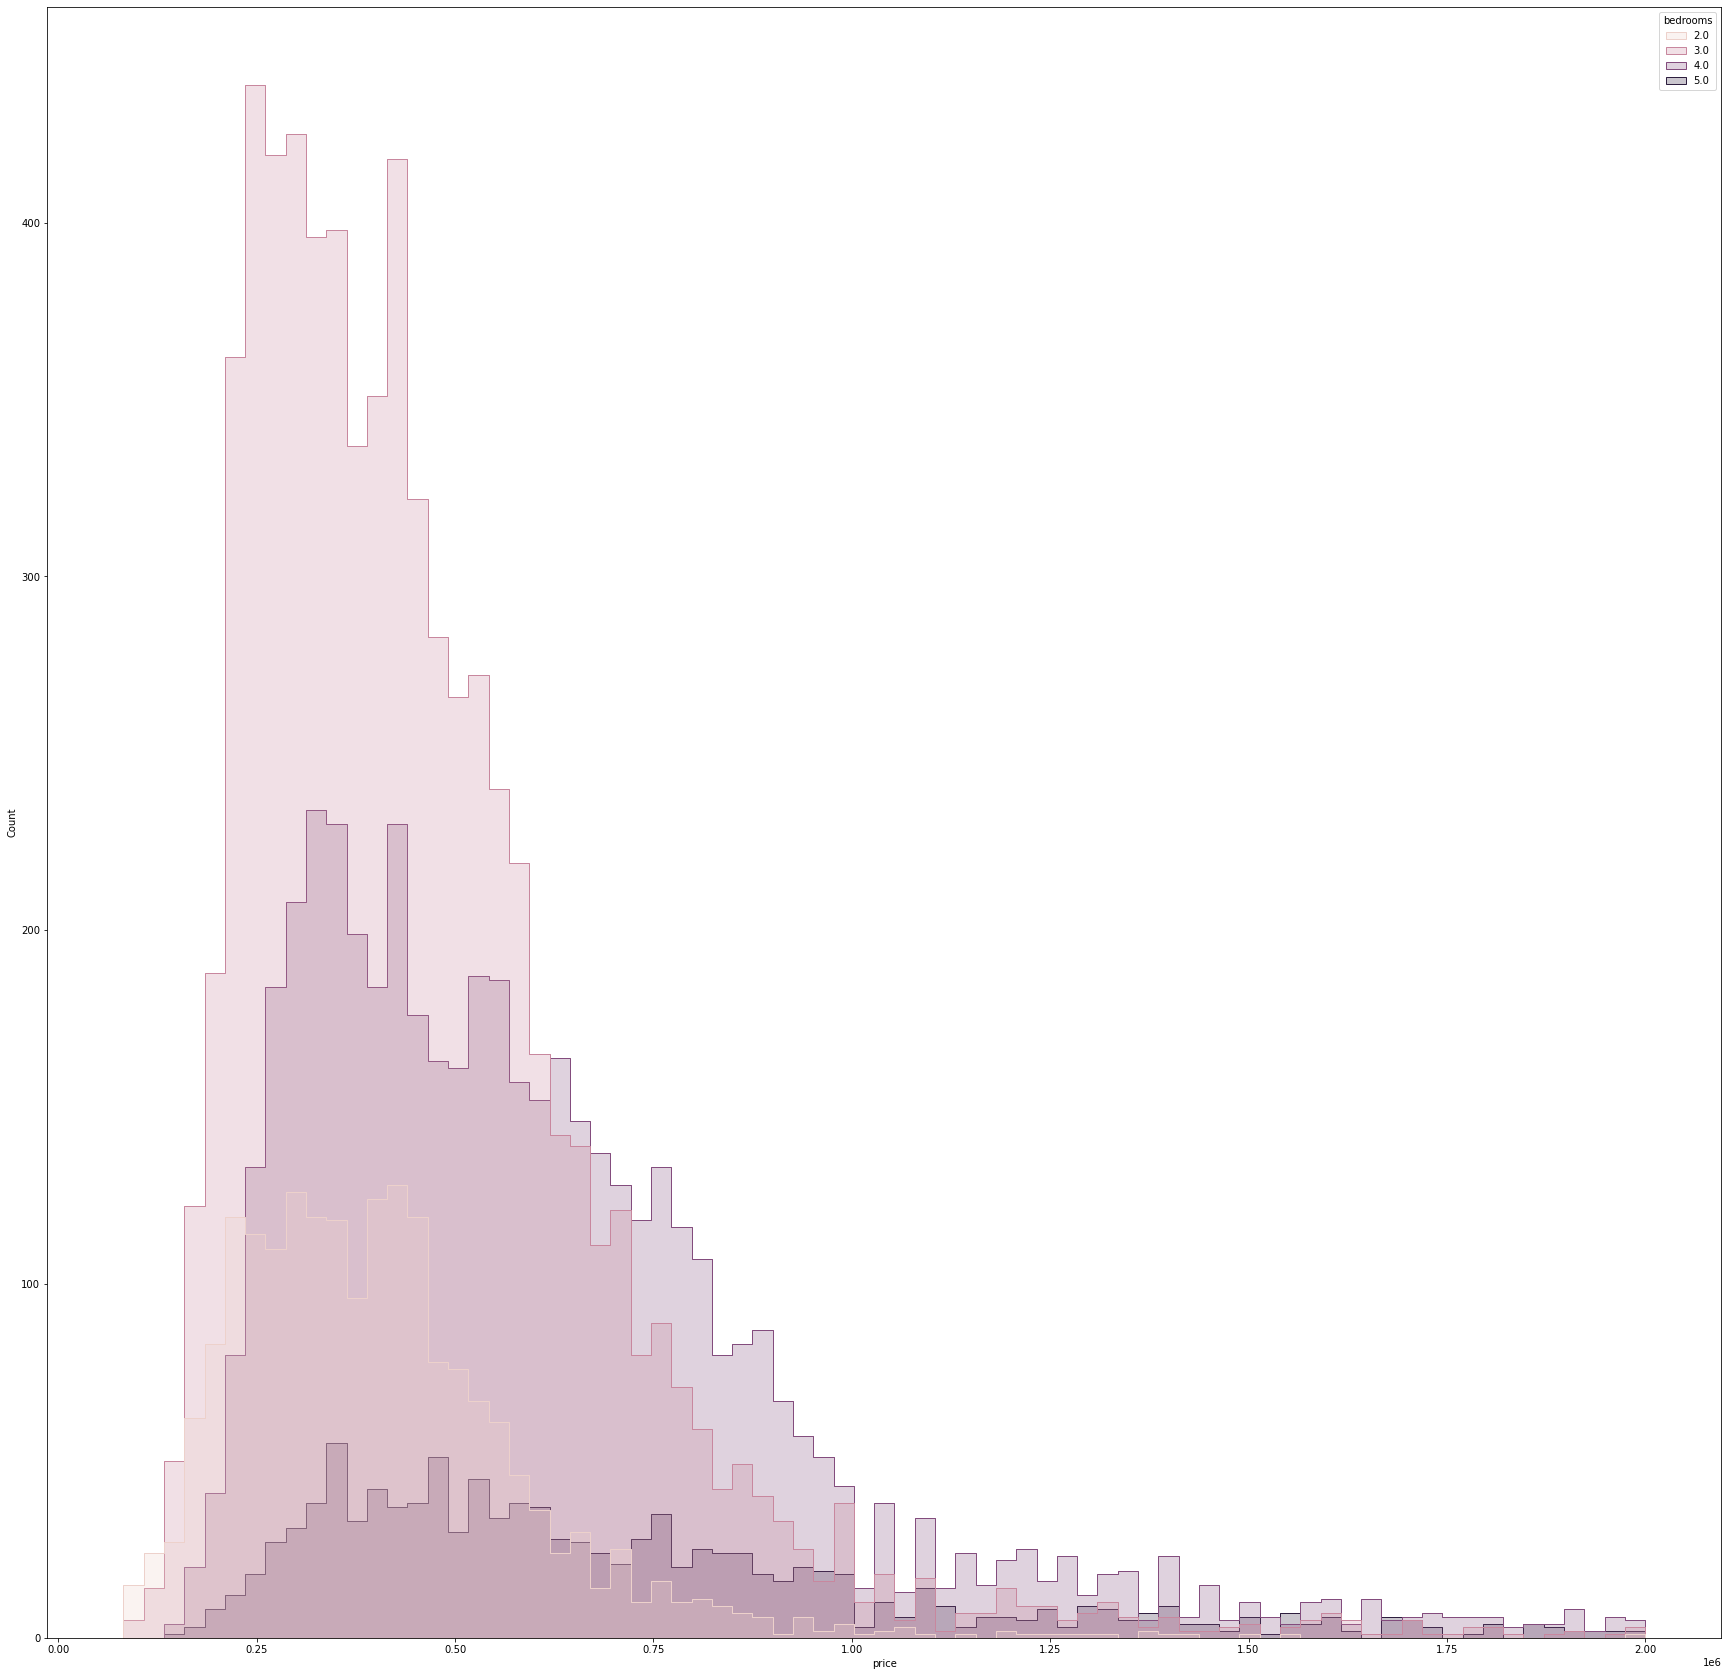

In [57]:
plt.figure(figsize=(30,30))
sns.histplot(x = 'price', hue = 'bedrooms', element="step", data = df_zip)
plt.show()

In [61]:
df_zip.groupby(['base_bool'])['price'].median()

base_bool
0    415000.0
1    500007.0
Name: price, dtype: float64

<AxesSubplot:xlabel='base_bool', ylabel='price'>

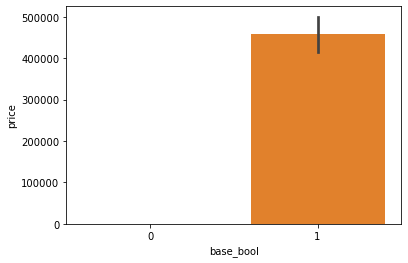

In [63]:
sns.barplot(x = df_zip['base_bool'], y = df_zip.groupby(['base_bool'])['price'].median() )